In [26]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import house_sales_data as hsd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data['price']
area = data['area']
beds = data['beds']

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [6]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)
    for t in range(max_iteration):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            costs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= learning_rate * grad
    return theta, costs

In [7]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return min_X, max_X, min_y, max_y
X = np.array([area, beds, np.ones(area.shape[0])]).T
y = price
ranges = normalize_data(X, y, [True, True, False])

In [ ]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    pass

In [14]:
#evaluation metric
def hypo(X,theta):
    return X@theta
def lossf(theta,X,y):
    return np.mean(np.square(hypo(X,theta)-y))
lossf(theta,X,y)

0.014339235247886856

In [27]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# call gradient descent and fine-tune your learning rate
theta,cost=gradient_descent(X,y,500,0.1)

In [10]:
print(theta)

[0.64617435 0.07955829 0.05428574]


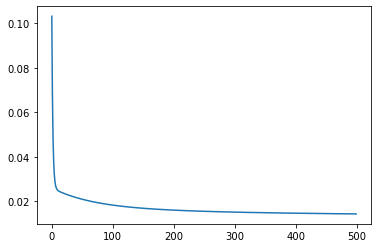

In [11]:
# plot cost vs iterations 
plt.plot(cost)
# note gradient descent return costs for all iterations

In [23]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get
losslist=[]
for i in np.arange(500,2001,100):
    theta,cost=gradient_descent(X,y,i,0.1)
    losslist.append(lossf(theta,X,y))
    

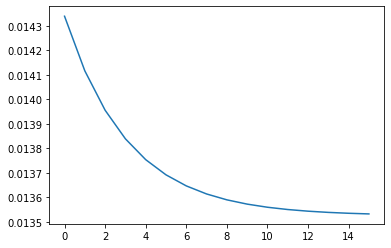

In [25]:
plt.plot(losslist)

In [29]:
#best value of evauation metric
theta,cost=gradient_descent(X,y,2000,0.1)
print(lossf(theta,X,y))


0.013531882302686968


In [30]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model

In [32]:
# Create linear regression object
reg=linear_model.LinearRegression()

In [33]:
# Train the model using the training sets
reg.fit(X_train,y_train)

LinearRegression()

In [34]:
# Predict on test set and print evaluation metric
# How much does it differ by from your (GD) solution
reg.predict(X_test)

array([0.33279794, 0.19847744, 0.46143228, 0.28216527, 0.26391927,
       0.13461642, 0.47808176, 0.16222921, 0.56476599, 0.18912636,
       0.25253123, 0.13416027, 0.21603922, 0.36291956, 0.2372502 ,
       0.24318015, 0.21079349, 0.35216861, 0.19461587, 0.25890162,
       0.14784477, 0.40420115, 0.28674249, 0.40006437, 0.23040795,
       0.20851274, 0.43701253, 0.24477667, 0.27305798, 0.25411204,
       0.19368786, 0.26141044, 0.14693247, 0.32619947, 0.17840683,
       0.31820113, 0.25618043, 0.38297445, 0.17110843, 0.24590134,
       0.15444324, 0.41034346, 0.25435583, 0.13736903, 0.47899406,
       0.29837432, 0.3360067 , 0.33576291, 0.26142615, 0.19187897,
       0.20668814, 0.18935443, 0.28423366, 0.35014736, 0.30546035,
       0.42240002, 0.43132637, 0.15537125, 0.13966549, 0.26165423,
       0.15651162, 0.23840628, 0.26802462, 0.17658223, 0.47262367,
       0.1503536 , 0.16268536, 0.18000336, 0.51160879, 0.41446452,
       0.14626396, 0.38732359, 0.32072567, 0.24296779, 0.33188

In [35]:
reg.coef_

array([ 0.85847455, -0.12666022,  0.        ])

In [36]:
lossf(reg.coef_,X,y)

0.021265380152388717

In [38]:
#best value of evauation metric
theta,cost=gradient_descent(X,y,2000,0.1)
print(lossf(theta,X,y))

0.013531882302686968
